# India Football Data 
In this notebook we will observe the dataset of all international football matches played in India from 1954-2019, we will try to make sense of the data, observe trends and validate them using pandas, seaborn and matlotlib libraries.
This is a part of the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com)

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - We will download the dataset of all international football matches from Kaggle thanks to Mart Jürisoo

In [118]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'http://www.kaggle.com/martj42/international-football-results-from-1872-to-2017' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

The dataset has been downloaded and extracted.

In [1]:
# Change this
data_dir = './international-football-results-from-1872-to-2017'

In [28]:
import os
os.listdir(data_dir)

['results.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "zerotopandas-football" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## Data Preparation and Cleaning

**TODO** - We will see a brief summary of the dataset, check for any missing values and overall datatypes of each column 



In [3]:
import pandas as pd
dataset=pd.read_csv('./international-football-results-from-1872-to-2017/results.csv')

In [122]:
#We are filtering out data for India
india_df=dataset[dataset.country=='India']

In [140]:
type(india_df)

pandas.core.frame.DataFrame

In [124]:
india_df.shape
#We see there are total of 255 rows and 9 columns in our dataset

(255, 9)

In [125]:
#Creating a new colum for total goals scored in a match
india_df['total_goals']=india_df.home_score+india_df.away_score

In [126]:
india_df.sample(10).head(10)
#Random sample of 10 entries from the dataset

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals
29456,2007-08-19,Kyrgyzstan,Cambodia,4,3,Nehru Cup,New Delhi,India,True,7
34350,2012-08-28,India,Nepal,0,0,Nehru Cup,New Delhi,India,False,0
21930,1999-04-25,Sri Lanka,Nepal,2,3,SAFF Cup,Margao,India,True,5
33769,2011-11-29,India,Zambia,0,5,Friendly,Margao,India,False,5
18777,1995-03-16,Thailand,Uzbekistan,0,1,Nehru Cup,Calcutta,India,True,1
23827,2001-04-15,India,Yemen,1,1,FIFA World Cup qualification,Bangalore,India,False,2
41371,2019-10-15,India,Bangladesh,1,1,FIFA World Cup qualification,Kolkota,India,False,2
13463,1985-01-29,China PR,Yugoslavia,1,1,Nehru Cup,Ernakulam,India,True,2
13467,1985-01-31,India,Morocco,0,1,Nehru Cup,Ernakulam,India,False,1
34349,2012-08-27,Maldives,Syria,2,1,Nehru Cup,New Delhi,India,True,3


In [9]:
#Converting the datatype of the 'date' column
pd.to_datetime(india_df['date'])

3740    1954-12-18
3741    1954-12-19
3743    1954-12-21
3744    1954-12-23
3745    1954-12-25
           ...    
40966   2019-07-15
40967   2019-07-16
40975   2019-07-19
41058   2019-09-05
41371   2019-10-15
Name: date, Length: 255, dtype: datetime64[ns]

In [127]:
india_df.info() 
#Structure of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 3740 to 41371
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         255 non-null    object
 1   home_team    255 non-null    object
 2   away_team    255 non-null    object
 3   home_score   255 non-null    int64 
 4   away_score   255 non-null    int64 
 5   tournament   255 non-null    object
 6   city         255 non-null    object
 7   country      255 non-null    object
 8   neutral      255 non-null    bool  
 9   total_goals  255 non-null    int64 
dtypes: bool(1), int64(3), object(6)
memory usage: 20.2+ KB


In [141]:
india_df.describe()
#Statistical values for dataframe

,home_score,away_score,total_goals,year,month,day,weekday
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,1.588235,1.333333,2.921569,2000.772549,6.462745,16.643137,3.019608
std,1.473873,1.381353,1.755118,14.955420,3.881815,9.080681,1.926710
min,0.000000,0.000000,0.000000,1954.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,1993.000000,3.000000,8.500000,1.000000
50%,1.000000,1.000000,3.000000,2007.000000,7.000000,17.000000,3.000000
75%,2.000000,2.000000,4.000000,2011.000000,10.000000,25.000000,5.000000
max,7.000000,8.000000,9.000000,2019.000000,12.000000,31.000000,6.000000


In [128]:
india_df.isnull().sum() 
#Count NA values for all columns

date           0
home_team      0
away_team      0
home_score     0
away_score     0
tournament     0
city           0
country        0
neutral        0
total_goals    0
dtype: int64

In [129]:
india_df.groupby(by='city').sum() 
#Different names for same cities

,home_score,away_score,neutral,total_goals
city,,,,
Ahmedabad,13,13,4,26
Bangalore,14,10,0,24
Bombay,10,4,1,14
Calcutta,86,66,30,152
Calicut,2,1,1,3
Chennai,2,2,0,4
Cochin,9,21,5,30
Ernakulam,16,21,11,37
Gangtok,3,0,1,3


In [130]:
india_df.loc[india_df['city'] == 'Calcutta', 'city'] = 'Kolkata'
india_df.loc[india_df['city'] == 'Kolkota', 'city'] = 'Kolkata'
india_df.loc[india_df['city'] == 'Bombay', 'city'] = 'Mumbai'
india_df.loc[india_df['city'] == 'Cochin', 'city'] = 'Kochi'
india_df.loc[india_df['city'] == 'Madras', 'city'] = 'Chennai'
india_df.loc[india_df['city'] == 'Calicut', 'city'] = 'Kozhikode'
india_df.loc[india_df['city'] == 'Trivandrum', 'city'] = 'Thiruvananthapuram'

# Replacing the old name of cities with the new name

In [131]:
home_score=(india_df.home_score.mean())
away_score=india_df.away_score.mean() #Home team scores more often

In [132]:
print('The average goals scored by home team is {:.2f} and the average goals scored by away team is {:.2f}.'.format(home_score,away_score))

The average goals scored by home team is 1.59 and the average goals scored by away team is 1.33.


In [133]:
india_df.city.value_counts()

#Count of all matches played in each city

New Delhi             56
Kolkata               55
Margao                22
Thiruvananthapuram    21
Hyderabad             19
Ernakulam             14
Kochi                 14
Mumbai                12
Chennai               10
Bangalore              9
Ahmedabad              7
Guwahati               4
Pune                   4
Siliguri               3
Gurgaon                2
Kozhikode              2
Gangtok                1
Name: city, dtype: int64

In [134]:
#Creating new columns based on the date column

india_df['year'] = pd.DatetimeIndex(india_df.date).year
india_df['month'] = pd.DatetimeIndex(india_df.date).month
india_df['day'] = pd.DatetimeIndex(india_df.date).day
india_df['weekday'] = pd.DatetimeIndex(india_df.date).weekday

In [135]:
#Creating a new column for home victory (boolean)
india_df['home_win'] = india_df.home_score>india_df.away_score
india_df.loc[india_df['home_score'] == india_df['away_score'], 'home_win'] = 'Draw'

In [29]:
#Saving our new cleaned dataframe as a csv file
india_df.to_csv('./international-football-results-from-1872-to-2017/india_matches.csv', index=None)

In [ ]:
import jovian

In [32]:
jovian.commit(files=['./international-football-results-from-1872-to-2017/india_matches.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vatsaakhil/zerotopandas-football" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/vatsaakhil/zerotopandas-football


'https://jovian.ai/vatsaakhil/zerotopandas-football'

## Exploratory Analysis and Visualization

**TODO** - We will see some visual trends now



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (15, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - We will explore some columns visually

In [142]:
india_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,year,month,day,weekday,home_win
3740,1954-12-18,Sri Lanka,Pakistan,1,2,Friendly,Kolkata,India,True,3,1954,12,18,5,False
3741,1954-12-19,India,Burma,2,1,Friendly,Kolkata,India,False,3,1954,12,19,6,True
3743,1954-12-21,India,Sri Lanka,1,1,Friendly,Kolkata,India,False,2,1954,12,21,1,Draw
3744,1954-12-23,Burma,Pakistan,1,1,Friendly,Kolkata,India,True,2,1954,12,23,3,Draw
3745,1954-12-25,Burma,Sri Lanka,1,2,Friendly,Kolkata,India,True,3,1954,12,25,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40966,2019-07-15,North Korea,Tajikistan,1,0,Intercontinental Cup,Ahmedabad,India,True,1,2019,7,15,0,True
40967,2019-07-16,India,Syria,1,1,Intercontinental Cup,Ahmedabad,India,False,2,2019,7,16,1,Draw
40975,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,1,2019,7,19,4,False
41058,2019-09-05,India,Oman,1,2,FIFA World Cup qualification,Guwahati,India,False,3,2019,9,5,3,False


In [40]:
#Setting date as the index 

india_df.set_index('date', inplace=True)

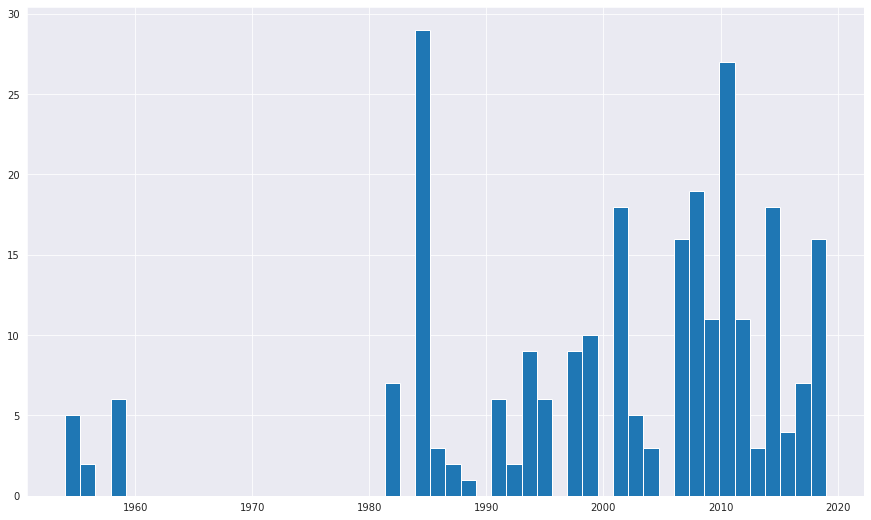

In [145]:
plt.hist(india_df.year,bins=50);

#We see missing values for 1960-1980

We see a big spike in 1984 when we played around 28 games and a similar spike in 2011, we will check on it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

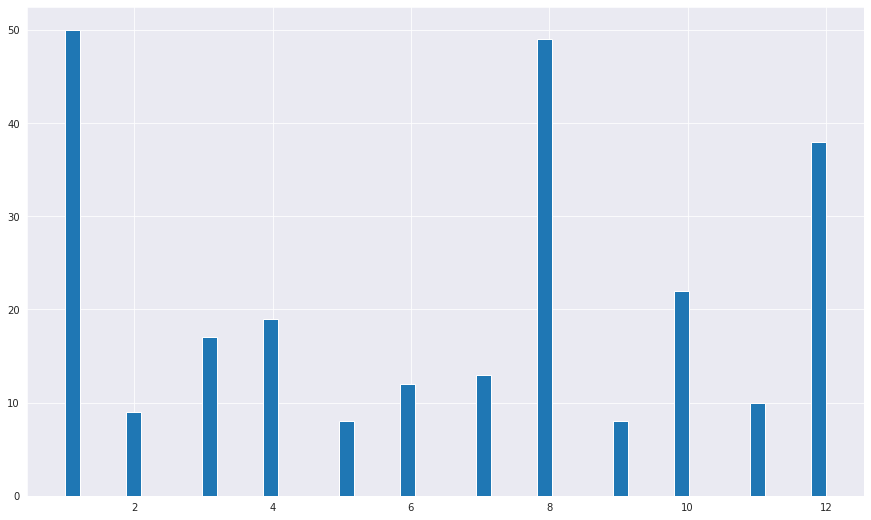

In [75]:
plt.hist(india_df.month,bins=50);

Most of the matches are played either in January, December or in August

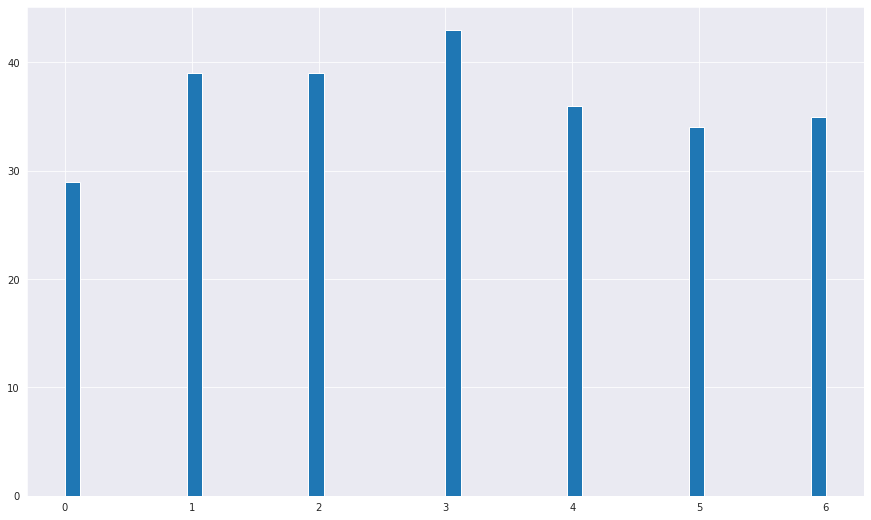

In [76]:
plt.hist(india_df.weekday,bins=50);

We see that most matches are played on weekdays and not on weekends, this can lead to less audience to the stadium

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [91]:
india_df.home_win.value_counts()

True     109
False     87
Draw      59
Name: home_win, dtype: int64

In [149]:
print('The home team has an advantage of winning with probability of {:.2f}.'.format(india_df.home_win.value_counts()[0]/india_df.home_win.count()))

The home team has an advantage of winning with probability of 0.43.


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

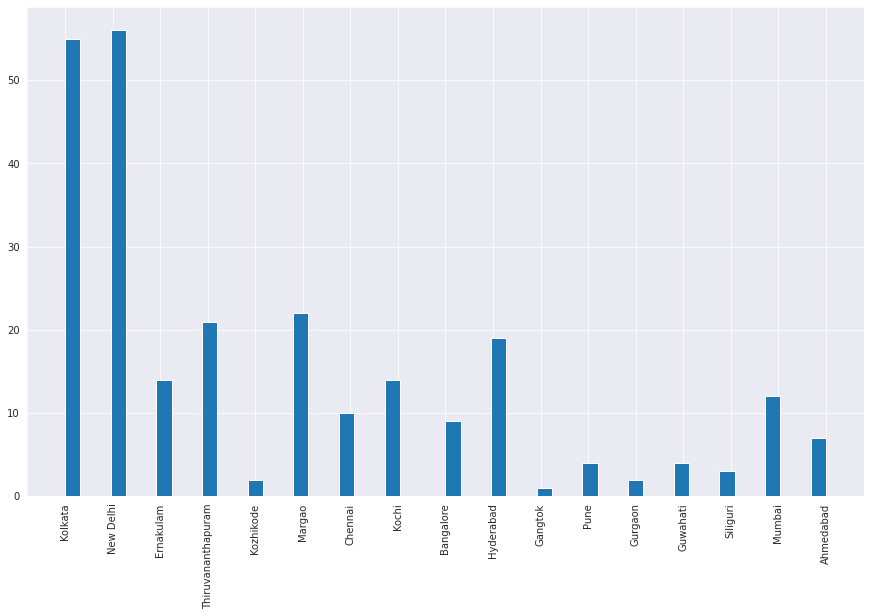

In [150]:
plt.hist(india_df.city,bins=50);
plt.xticks(rotation=90);


New Delhi and Kolkata have a disproportionate share of football matches

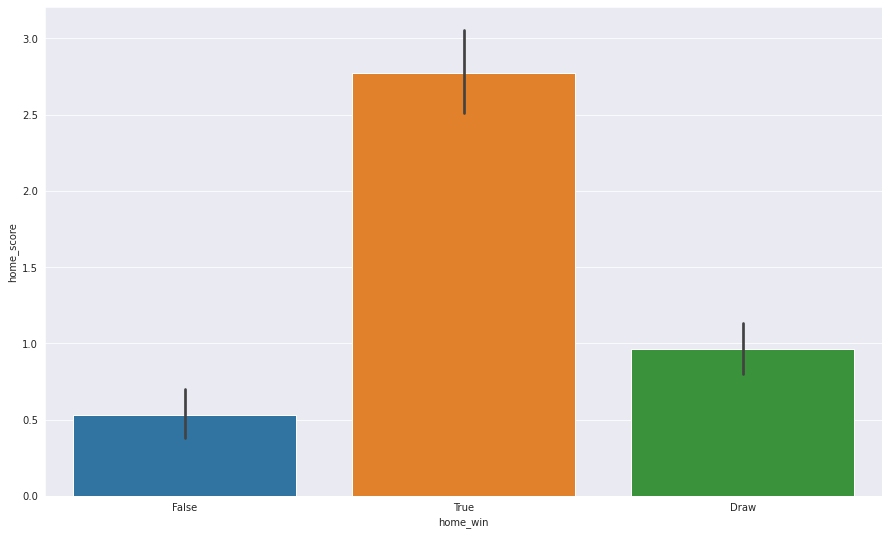

In [101]:
sns.barplot(x='home_win', y='home_score', data=india_df);

The home team scores 2.7 goals on an average to win a match

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

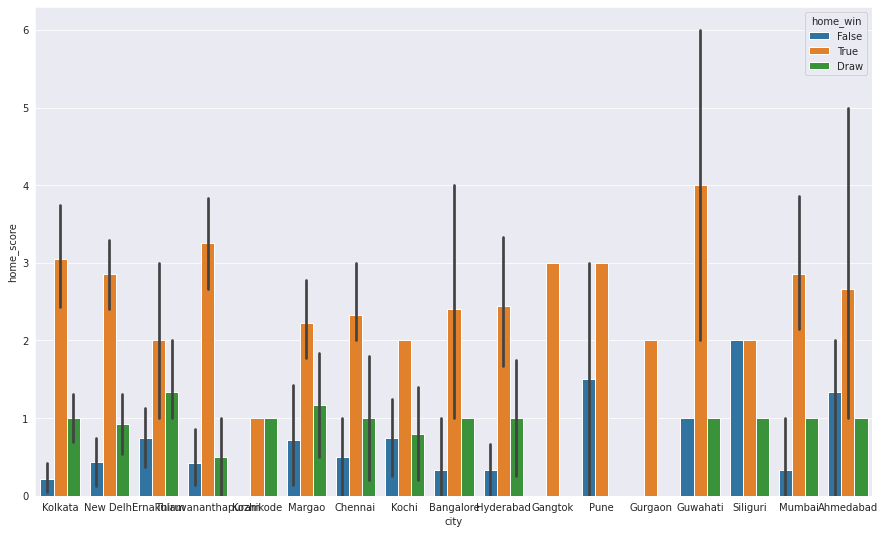

In [103]:
sns.barplot(x='city', y='home_score', data=india_df,hue='home_win');

We observe that Guwahati has most goals scored by the home team
Probability of winning a game is most in Kolkata and Thiruvananthapuram (if we exclude outliers Gangtok,Gurgaon)


Let us save and upload our work to Jovian before continuing

In [110]:
import jovian

In [152]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vatsaakhil/zerotopandas-football" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/vatsaakhil/zerotopandas-football


'https://jovian.ai/vatsaakhil/zerotopandas-football'

## Asking and Answering Questions

TODO - We will answer some more questions



#### Q1: TODO - The game with highest home score

In [112]:
india_df.loc[india_df[['home_score']].idxmax()]

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,year,month,day,weekday,home_win
date,,,,,,,,,,,,,,
1992-05-11,Iran,Pakistan,7,0,AFC Asian Cup qualification,Kolkata,India,True,7,1992,5,11,0,True


Iran beat Pakistan 7-0 in 1992

#### Q2: TODO - The game with highest away score

In [153]:
india_df.loc[india_df[['away_score']].idxmax()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,year,month,day,weekday,home_win
33799,2011-12-07,Bhutan,Afghanistan,1,8,SAFF Cup,New Delhi,India,True,9,2011,12,7,2,False


Afghanistan beat Bhutan 8-1 in 2011

#### Q3: TODO - Game with most goals

In [154]:
india_df.loc[india_df[['total_goals']].idxmax()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,year,month,day,weekday,home_win
32547,2010-10-13,India,Yemen,3,6,Friendly,Pune,India,False,9,2010,10,13,2,False


Yemen beat India 6-3 in 2010

#### Q4: TODO - Relation between pairs of columns

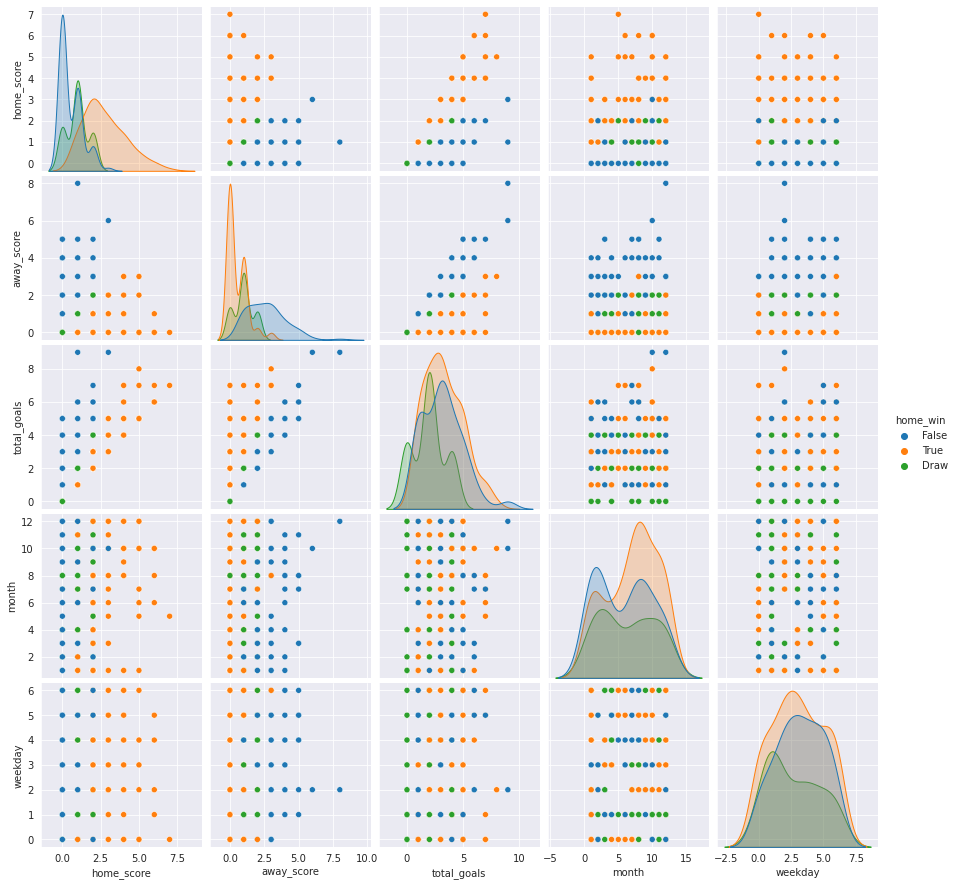

In [155]:
sns.pairplot(india_df, hue='home_win', x_vars=["home_score", "away_score", "total_goals","month","weekday"],
    y_vars=["home_score", "away_score", "total_goals","month","weekday"]);

#### Q5: TODO - Unusally high number of matches in 1984 and 2011?

In [157]:
india_df[india_df.year==1984]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,year,month,day,weekday,home_win
12918,1984-01-11,India,Poland,1,2,Nehru Cup,Kolkata,India,False,3,1984,1,11,2,False
12919,1984-01-14,India,Argentina,0,1,Nehru Cup,Kolkata,India,False,1,1984,1,14,5,False
12920,1984-01-15,China PR,Poland,0,1,Nehru Cup,Kolkata,India,True,1,1984,1,15,6,False
12922,1984-01-17,Argentina,Poland,1,1,Nehru Cup,Kolkata,India,True,2,1984,1,17,1,Draw
12926,1984-01-20,Argentina,China PR,0,1,Nehru Cup,Kolkata,India,True,1,1984,1,20,4,False
12930,1984-01-25,India,China PR,0,3,Nehru Cup,Kolkata,India,False,3,1984,1,25,2,False
12931,1984-01-27,China PR,Poland,0,1,Nehru Cup,Kolkata,India,True,1,1984,1,27,4,False
13258,1984-10-10,South Korea,Yemen,6,0,AFC Asian Cup qualification,Kolkata,India,True,6,1984,10,10,2,True
13263,1984-10-11,Malaysia,Pakistan,5,0,AFC Asian Cup qualification,Kolkata,India,True,5,1984,10,11,3,True
13265,1984-10-12,India,Yemen,4,0,AFC Asian Cup qualification,Kolkata,India,False,4,1984,10,12,4,True


We had Nehru Cup and Asian Cup qualification games

In [158]:
india_df[india_df.year==2011]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,year,month,day,weekday,home_win
32870,2011-03-23,Bhutan,Afghanistan,0,3,AFC Challenge Cup qualification,Gurgaon,India,True,3,2011,3,23,2,False
32877,2011-03-25,Afghanistan,Bhutan,2,0,AFC Challenge Cup qualification,Gurgaon,India,True,2,2011,3,25,4,True
33247,2011-07-28,India,United Arab Emirates,2,2,FIFA World Cup qualification,New Delhi,India,False,4,2011,7,28,3,Draw
33349,2011-09-02,Argentina,Venezuela,1,0,Friendly,Kolkata,India,True,1,2011,9,2,4,True
33690,2011-11-13,India,Malaysia,1,1,Friendly,Guwahati,India,False,2,2011,11,13,6,Draw
33752,2011-11-16,India,Malaysia,3,2,Friendly,Kolkata,India,False,5,2011,11,16,2,True
33769,2011-11-29,India,Zambia,0,5,Friendly,Margao,India,False,5,2011,11,29,1,False
33776,2011-12-02,Bangladesh,Pakistan,0,0,SAFF Cup,New Delhi,India,True,0,2011,12,2,4,Draw
33779,2011-12-02,Maldives,Nepal,1,1,SAFF Cup,New Delhi,India,True,2,2011,12,2,4,Draw
33782,2011-12-03,India,Afghanistan,1,1,SAFF Cup,New Delhi,India,False,2,2011,12,3,5,Draw


We had SAFF Cup

In [167]:
india_df.tournament.value_counts()

Nehru Cup                          89
Friendly                           37
SAFF Cup                           37
AFC Asian Cup qualification        26
FIFA World Cup qualification       19
AFC Challenge Cup                  16
Millennium Cup                     15
Intercontinental Cup               14
AFC Challenge Cup qualification     2
Name: tournament, dtype: int64

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [163]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vatsaakhil/zerotopandas-football" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/vatsaakhil/zerotopandas-football


'https://jovian.ai/vatsaakhil/zerotopandas-football'

## Inferences and Conclusion


From this data we were able to oserve following broad trends:
<ol>
<li>Most matches are played in January, August and December</li>
<li>The home team has 0.42 probability of winning</li>
<li>Most games are played on weekdays</li>
<li>The probability of home team winning is more if the game is played in Kolkata or Thiruvananthapuram</li>
<li>Guwahati has most goals scored in a match on an average</li>
<li>Nehru Cup has the most games of all tournament</li>
<li>New Delhi and Kolkata have the most number of matches</li>
</ol>
   

In [168]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

**TODO** - Visit this link for more reference-> https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017



In [ ]:
import jovian

In [165]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vatsaakhil/zerotopandas-football" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/vatsaakhil/zerotopandas-football


'https://jovian.ai/vatsaakhil/zerotopandas-football'